#### NETFLIX ANALYSIS

In [1]:
# Importo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importo di dati relativi al dataset Netflix
df=pd.read_csv('netflix_titles.csv')

In [3]:
# Plotto le prime righe per avere un'idea di come siano i dati
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Printo le informazioni essenziali del database
df.info()
# Guardo le dimensioni della matrice (righe e colonne)
print("shape:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
shape: (8807, 12)


#### Analisi sui generi

In [5]:
# Creo una lista con tutti i generi divisi

# I generi li prendo da 'listed_in' e tolgo i nan con dropna
genre_series=df['listed_in'].dropna()

# Divido i generi in liste con split
genre_lists=genre_series.str.split(',')

# Uso exlode per dividere i film che sono dentro a più generi
genre_expanded=genre_lists.explode()

# Tolgo eventuali spazi inutili con strip
genre_cleaned=genre_expanded.str.strip()

# Conto quanti generi ci sono in tutto
genre_count=genre_cleaned.value_counts()


# Printo i primi 10
genre_count.head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

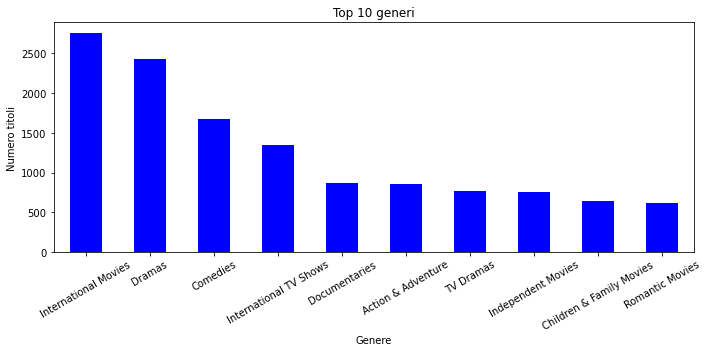

In [6]:
# Plotto la top 10 dei dati

top10=genre_count.head(10)
top10.plot(kind='bar',figsize=(10,5),color='blue')

plt.title('Top 10 generi')
plt.xlabel('Genere')
plt.ylabel('Numero titoli')
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

#### Analisi per tipologia (Film vs Serie Tv)

In [7]:
# Conto quanti film e quante serie tv ci sono
contoTipi=df['type'].value_counts()
print(contoTipi)

Movie      6131
TV Show    2676
Name: type, dtype: int64


In [8]:
# Calcolo in percentuale a quanto equivalgono

# Conto quanti titoli ci sono per Serie Tv e per Film
generi=df['type'].value_counts()
# Li metto in percentuali
generiPerc=generi/np.sum(generi)*100

# Mi tipo fuori i tipi (film o serie Tv)
tipi=df['type'].value_counts().index

print(generiPerc.round(2))

Movie      69.62
TV Show    30.38
Name: type, dtype: float64


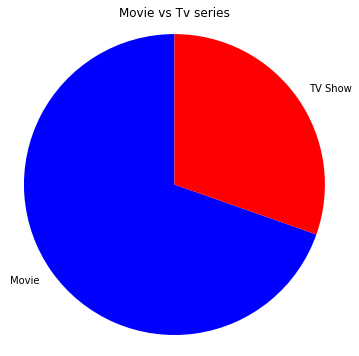

In [9]:
# Plotto in un grafico a torta

plt.figure(figsize=(6,6))
plt.pie(generiPerc,labels=tipi,colors=['blue','red'],startangle=90)
plt.title('Movie vs Tv series')
plt.axis('equal')
plt.show()

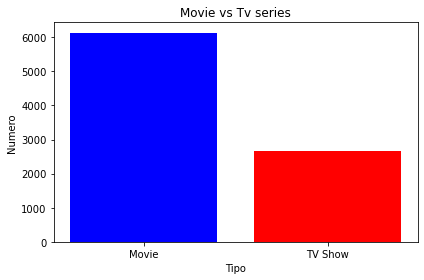

In [10]:
# Plotto in un grafico a barre
plt.figure(figsize=(6,4))
plt.bar(tipi,generi, color=['blue','red'])
plt.title('Movie vs Tv series')
plt.xlabel('Tipo')
plt.ylabel('Numero')
plt.tight_layout()

plt.show()

#### Annualità delle Serie Tv e dei Film

In [11]:
# Guardo quanti film e quante serie tv sono state rilasciate ogni anno

# Raggruppo per anno e per tipo
ContoTipiAnno=df.groupby(['release_year','type']).size().unstack()
# Faccio un sorting per rimetterli in ordine
ContoTipiAnno=ContoTipiAnno.sort_index()

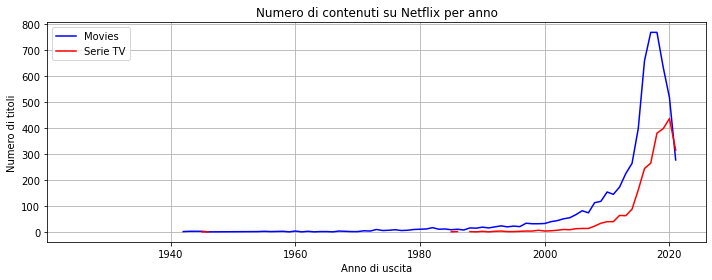

In [12]:
# Plotto l'andamento sia dei film che delle serie tv

plt.figure(figsize=(10,4))
plt.plot(ContoTipiAnno.index,ContoTipiAnno['Movie'],label='Movies',color='blue')
plt.plot(ContoTipiAnno.index,ContoTipiAnno['TV Show'],label='Serie TV',color='red')
plt.title('Numero di contenuti su Netflix per anno')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


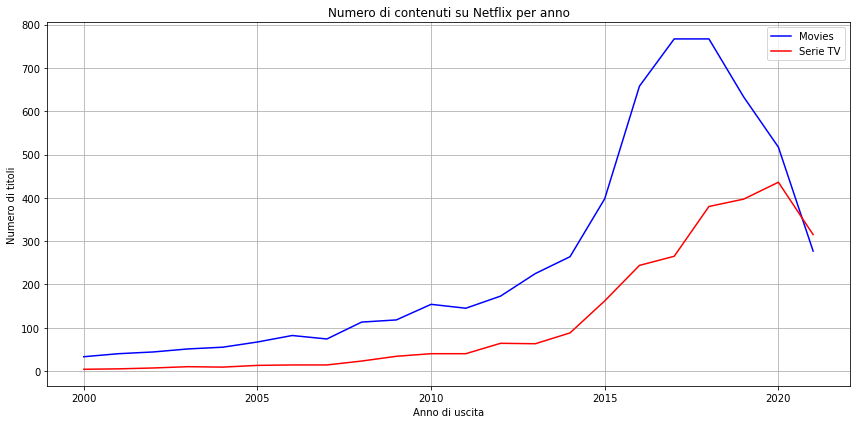

In [13]:
# Guardo gli ultimi 10 anni per fare un focus, si vede che sono i dati più interessanti

# Taglio dal 2000 in poi
ultimiAnni=ContoTipiAnno[ContoTipiAnno.index>=2000]
ContoTipiAnno.tail()

plt.figure(figsize=(12,6))
plt.plot(ultimiAnni.index,ultimiAnni['Movie'],label='Movies',color='blue')
plt.plot(ultimiAnni.index,ultimiAnni['TV Show'],label='Serie TV',color='red')
plt.title('Numero di contenuti su Netflix per anno')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Top 10 paesi che accedono a netflix

In [14]:
# conto quanti sono i paesi che accedono a Netflix

# Tolgo i nan, divido in diverse liste e poi separo quanto ho due stati nella stessa lista
all_country=df['country'].dropna().str.split(',').explode().str.strip()

# Ora che i dati sono puliti posso contarli
country_count=all_country.value_counts()

# Plotto solo i primi 10
country_count.head(10)

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

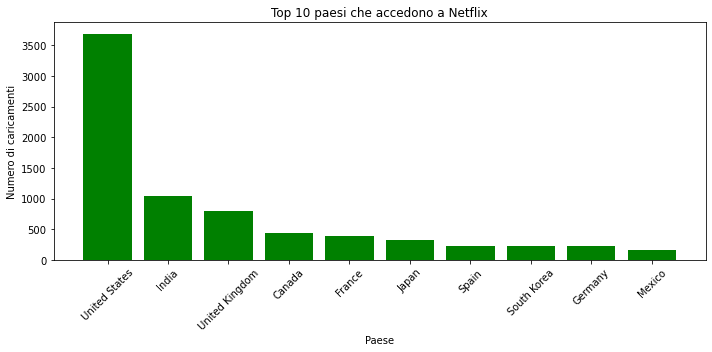

In [15]:
# plotto in un grafico a barre
country=country_count.head(10)
plt.figure(figsize=(10,5))
plt.bar(country.index,country.values,color='green')
plt.title('Top 10 paesi che accedono a Netflix')
plt.xlabel('Paese')
plt.ylabel('Numero di caricamenti')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()